In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [4]:
def zero_pad(X, pad):
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values = (0, 0))

    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


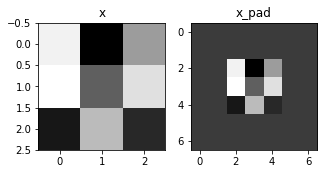

In [5]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [6]:
def conv_single_step(a_slice_prev, W, b):
    s = np.multiply(a_slice_prev, W)
    Z = np.sum(s)
    Z = Z + float(b)

    return Z

In [7]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


In [8]:
def conv_forward(A_prev, W, b, hparameters):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape[0], A_prev.shape[1], A_prev.shape[2], A_prev.shape[3]
    
    
    (f, f, n_C_prev, n_C) = W.shape[0], W.shape[1], W.shape[2], W.shape[3]
    
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    n_H = int(int(n_H_prev + 2*pad - f)/stride + 1)
    n_W = int(int(n_W_prev + 2*pad - f)/stride + 1)
    
    Z = np.zeros([m, n_H, n_W, n_C])
    
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H):          
            vert_start = stride * h
            vert_end = vert_start + f
            
            for w in range(n_W):      
                horiz_start = stride * w
                horiz_end = horiz_start + f
                
                for c in range(n_C):
                    a_slice_prev = A_prev_pad[i, vert_start:vert_end, horiz_start:horiz_end, :]
                    
                    weights = W[:, :, :, c]
                    biases = b[:, :, :, c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, biases)
                                        
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [9]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad": 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 0.6923608807576933
Z[3,2,1] =
 [-1.28912231  2.27650251  6.61941931  0.95527176  8.25132576  2.31329639
 13.00689405  2.34576051]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


In [10]:
def pool_forward(A_prev, hparameters, mode = "max"):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    f = hparameters["f"]
    stride = hparameters["stride"]

    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    A = np.zeros((m, n_H, n_W, n_C))

    for i in range(m):
        for h in range(n_H):
            vert_start = stride * h
            vert_end = vert_start + f

            for w in range(n_W):
                horiz_start = stride * w
                horiz_end = horiz_start + f

                for c in range(n_C):
                    a_prev_slice = A_prev[i]

                    if mode == "max":
                        A[i, h, w, c] = np.mean(a_slice_prev[vert_start:vert_end, horiz_start:horiz_end, c])
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_slice_prev[vert_start:vert_end, horiz_start:horiz_end, c])

    cache = (A_prev, hparameters)

    assert(A.shape == (m, n_H, n_W, n_C))

    return A, cache

In [11]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A=\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A=
 [[[[ 0.02105773 -0.20328806 -0.40389855]
   [-0.2181241   0.17137763 -0.63201171]
   [ 0.19091874  0.18621789 -0.50651063]]

  [[-0.35878816  0.04588866 -0.03349274]
   [-0.33641105  0.18529161 -0.04244791]
   [-0.28901381  0.38329606  0.14218346]]

  [[-0.30816645  0.06444421  0.09054558]
   [-0.51912427  0.05927447  0.18232535]
   [-0.73025508  0.20384261  0.3628064 ]]]


 [[[ 0.02105773 -0.20328806 -0.40389855]
   [-0.2181241   0.17137763 -0.63201171]
   [ 0.19091874  0.18621789 -0.50651063]]

  [[-0.35878816  0.04588866 -0.03349274]
   [-0.33641105  0.18529161 -0.04244791]
   [-0.28901381  0.38329606  0.14218346]]

  [[-0.30816645  0.06444421  0.09054558]
   [-0.51912427  0.05927447  0.18232535]
   [-0.73025508  0.20384261  0.3628064 ]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ 0.02105773 -0.20328806 -0.40389855]
   [-0.2181241   0.17137763 -0.63201171]
   [ 0.19091874  0.18621789 -0.50651063]]

  [[-0.35878816  0.04588866 -0.03349274]

In [12]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 2, 2, 3)
A =
 [[[[ 0.02105773 -0.20328806 -0.40389855]
   [ 0.19091874  0.18621789 -0.50651063]]

  [[-0.30816645  0.06444421  0.09054558]
   [-0.73025508  0.20384261  0.3628064 ]]]


 [[[ 0.02105773 -0.20328806 -0.40389855]
   [ 0.19091874  0.18621789 -0.50651063]]

  [[-0.30816645  0.06444421  0.09054558]
   [-0.73025508  0.20384261  0.3628064 ]]]]

mode = average
A.shape = (2, 2, 2, 3)
A =
 [[[[ 0.02105773 -0.20328806 -0.40389855]
   [ 0.19091874  0.18621789 -0.50651063]]

  [[-0.30816645  0.06444421  0.09054558]
   [-0.73025508  0.20384261  0.3628064 ]]]


 [[[ 0.02105773 -0.20328806 -0.40389855]
   [ 0.19091874  0.18621789 -0.50651063]]

  [[-0.30816645  0.06444421  0.09054558]
   [-0.73025508  0.20384261  0.3628064 ]]]]


In [19]:
def conv_backward(dZ, cache):
    (A_prev, W, b, hparameters) = cache

    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    (f, f, n_C_prev, n_C) = W.shape

    stride = hparameters['stride']
    pad = hparameters['pad']

    (m, n_H, n_W, n_C) = dZ.shape

    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))

    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)

    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]

        for h in range(n_H_prev):
            for w in range(n_W_prev):
                for c in range(n_C_prev):
                    vert_start = h
                    vert_end = vert_start + f 
                    horiz_start = w
                    horiz_end = horiz_start + f

                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end]

                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]

        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]

    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))

    return dA_prev, dW, db

In [20]:
np.random.seed(1)
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad": 2,
               "stride": 2}
Z, cache_conv = conv_forward(A_prev, W, b, hparameters)

dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

dA_mean = 0.19873382533544906
dW_mean = 0.32135653076841114
db_mean = -7.562157924688098


In [21]:
def create_mask_from_window(x):
    mask = x == np.max(x)

    return mask

In [22]:
np.random.seed(1)
x = np.random.randn(2, 3)
mask = create_mask_from_window(x)
print('x =', x)
print("mask =", mask)

x = [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask = [[ True False False]
 [False False False]]


In [23]:
def distribute_value(dz, shape):
    (n_H, n_W) = shape

    average = dz / (n_H * n_W)

    a = np.ones(shape) * average

    return a

In [24]:
a = distribute_value(2, (2, 2))
print('distributed value =', a)

distributed value = [[0.5 0.5]
 [0.5 0.5]]


In [25]:
def pool_backward(dA, cache, mode = "max"):
    (A_prev, hparameters) = cache

    stride = hparameters["stride"]
    f = hparameters["f"]

    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape

    dA_prev = np.zeros((A_prev.shape))

    for i in range(m):
        a_prev = A_prev[i]

        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):

                    vert_start = h 
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f

                    if mode == "max":

                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                        mask = create_mask_from_window(a_prev_slice)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += np.multiply(mask, dA[i, h, w, c])

                    elif mode == "average":

                        da = dA[i, h, w, c]
                        shape = (f, f)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += distribute_value(da, shape)

    assert(dA_prev.shape == A_prev.shape)

    return dA_prev

In [26]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])  
print()
dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1]) 

mode = max
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]
